In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
import json
import glob
from collections import defaultdict
import pandas as pd
import seaborn as sns

In [2]:
ctypes = []
FOLDS = 5

for x in glob.glob("/oak/stanford/groups/akundaje/surag/projects/retina_Howard/models/20220202_bpnet/fold0/saved/*.h5"):
    ctype = x.split("/")[-1].split(".")[0]
    ctypes.append(ctype)
    print(ctype)

Rodbipolar
Microglia
Mullerglia
Astrocyte
Rod
GABAamacrine
ONconebipolar
Horizontal
Cone
AIIamacrine
OFFconebipolar
Glyamacrine
Retinalganglioncell


In [3]:
metrics = defaultdict(dict)

for i in range(FOLDS):
    for m in ctypes:
        with open("/oak/stanford/groups/akundaje/surag/projects/retina_Howard/models/20220202_bpnet/fold{}/metrics/{}.metrics.json".format(i, m)) as f:
            metrics[i][m] = json.load(f)

In [4]:
metrics[0]['Rod']

{'bpnet_cts_pearson_peaks_nonpeaks': 0.6929561780826818,
 'bpnet_cts_spearman_peaks_nonpeaks': 0.6762935417448935,
 'binary_auc': 0.8105180906101711,
 'bpnet_cts_pearson_peaks': 0.6822460332630339,
 'bpnet_cts_spearman_peaks': 0.5647475495413053,
 'bpnet_profile_median_jsd_peaks': 0.29371089680511064,
 'bpnet_profile_median_jsd_peaks_randomized': 0.6880808287923185}

## Peak + nonpeak Pearson

In [51]:
COLORS = ['#1D1A31', '#6CA2EA', '#B5D33D', '#EB7D5B', 'r']

In [23]:
peak_nonpeak_pearson_df = []

for i in range(FOLDS):
    for m in ctypes:
        peak_nonpeak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks_nonpeaks']})
        
peak_nonpeak_pearson_df = pd.DataFrame(peak_nonpeak_pearson_df)

In [24]:
peak_nonpeak_pearson_df.head()

,fold,ctype,pearson_r
0,0,Rodbipolar,0.749658
1,0,Microglia,0.755856
2,0,Mullerglia,0.752462
3,0,Astrocyte,0.747576
4,0,Rod,0.692956


In [25]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

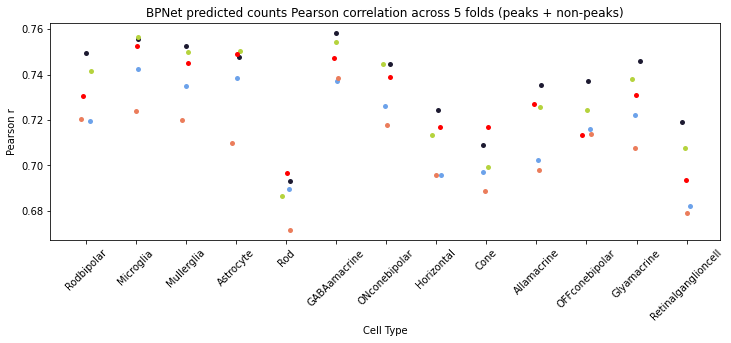

In [53]:
for i in range(FOLDS):
    sns.stripplot(x=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].ctype, 
                  y=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i],
                  jitter=True)
plt.xticks(rotation=45)
plt.title("BPNet predicted counts Pearson correlation across 5 folds (peaks + non-peaks)")
plt.xlabel("Cell Type")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_nonpeaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

## Peaks pearson

In [28]:
peak_pearson_df = []

for i in range(FOLDS):
    for m in ctypes:
        peak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks']})
        
peak_pearson_df = pd.DataFrame(peak_pearson_df)

In [29]:
peak_pearson_df.head()

,fold,ctype,pearson_r
0,0,Rodbipolar,0.699817
1,0,Microglia,0.788811
2,0,Mullerglia,0.707307
3,0,Astrocyte,0.758669
4,0,Rod,0.682246


In [30]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

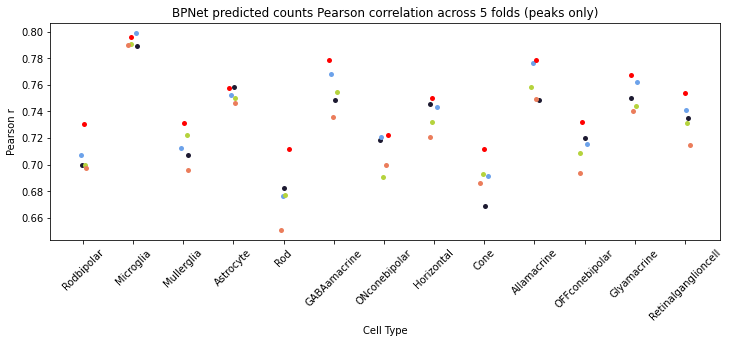

In [54]:
for i in range(FOLDS):
    sns.stripplot(x=peak_pearson_df[peak_pearson_df['fold']==i].ctype, 
                  y=peak_pearson_df[peak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i],
                  jitter=True)

plt.xticks(rotation=45)
plt.title("BPNet predicted counts Pearson correlation across 5 folds (peaks only)")
plt.xlabel("Cell Type")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

### JSD peaks

In [36]:
jsd_df = []

for i in range(FOLDS):
    for m in ctypes:
        jsd_df.append({"fold":i, 
                                "ctype":m,
                                "JSD":metrics[i][m]['bpnet_profile_median_jsd_peaks']})
        
jsd_df = pd.DataFrame(jsd_df)

In [37]:
jsd_df.head()

,fold,ctype,JSD
0,0,Rodbipolar,0.525024
1,0,Microglia,0.627609
2,0,Mullerglia,0.466951
3,0,Astrocyte,0.644648
4,0,Rod,0.293711


In [38]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

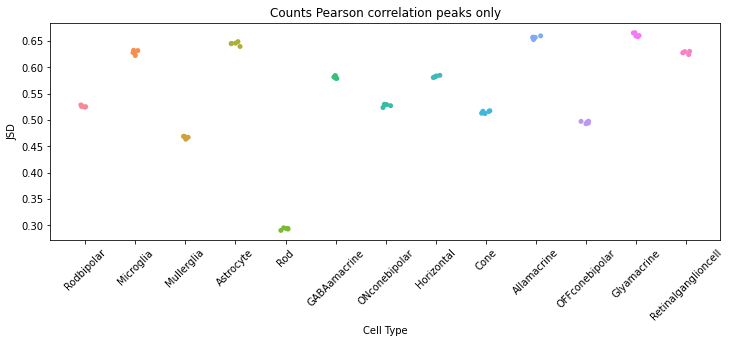

In [39]:
sns.stripplot(x=jsd_df.ctype, 
              y=jsd_df.JSD, 
              jitter=True)
plt.xticks(rotation=45)
plt.title("Counts Pearson correlation peaks only")
plt.xlabel("Cell Type")
plt.ylabel("JSD")
# plt.savefig("./plots/peaks_JSD.pdf",
#            bbox_inches = "tight")
plt.plot()